#Reading Files

In [ ]:
import pandas as pd
testfilename = "/content/AllDataSet.csv" #Test data file
trainfilename = "/content/Final_TrainData_ACL&ALL.csv" #Training/labeled data file 
d1 = pd.read_csv(testfilename, encoding= 'unicode_escape')
d2 = pd.read_csv(trainfilename, encoding= 'unicode_escape')


In [ ]:
d1.head()

,Title,Contributions,Source,Labels
0,The measurement of âinterdisciplinarityâ a...,"In this study, we discuss recent advances in t...",JASIST,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,NaN


In [ ]:
d2.head()

,Title,Contributions,Source,Labels
0,Text Mining for Personalized Knowledge Extract...,Extend and evaluate existing textâmining tec...,JASIST,Algorithm or Method or Technology Optimization
1,Text Mining for Personalized Knowledge Extract...,Design and develop a layer for extraction of k...,JASIST,New Algorithm or Method or Technology
2,Text Mining for Personalized Knowledge Extract...,"Evaluate relevance, reliability, and demonstra...",JASIST,Performance Evaluation
3,PSI: A probabilistic semantic interpretable fr...,A novel semantic interpretable framework is pr...,JASIST,Model Construction
4,PSI: A probabilistic semantic interpretable fr...,with the attribute based representation and su...,JASIST,Algorithm or Method or Technology Optimization


#Data Cleaning

In [ ]:
d1['lower_Case'] = d1['Contributions'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
d2['lower_Case'] = d2['Contributions'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
d1['remove_Punc'] = d1['lower_Case'].str.replace('[^\w\s]','')
d2['remove_Punc'] = d2['lower_Case'].str.replace('[^\w\s]','')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
d1['stop_words'] = d1['remove_Punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
d2['stop_words'] = d2['remove_Punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
frequent_words = list(pd.Series(' '.join(str(d1['Contributions'])).split()).value_counts()[:15].index)
d1["freq_words"] = d1['stop_words'].apply(lambda x: ' '.join([i for i in x.split() if i not in frequent_words]))


In [ ]:
frequent_words = list(pd.Series(' '.join(d2['Contributions']).split()).value_counts()[:15].index)
d2["freq_words"] = d2['stop_words'].apply(lambda x: ' '.join([i for i in x.split() if i not in frequent_words]))


In [ ]:
from textblob import TextBlob
d1['word_tokenize'] = d1['freq_words'].apply(lambda x: TextBlob(x).words)

In [ ]:
from textblob import TextBlob
d2['word_tokenize'] = d2['freq_words'].apply(lambda x: TextBlob(x).words)

In [ ]:
import nltk
nltk.download('wordnet')
from textblob import Word
d1['lemmatized'] = d1['word_tokenize'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from textblob import Word
d2['lemmatized'] = d2['word_tokenize'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

In [ ]:
test = d1[[ 'Contributions', 'Source', 'Labels']] #clean test data
train = d2[['Contributions', 'Source', 'Labels']] #clean train data

In [ ]:
test.to_csv('/content/test.csv', index = False)
train.to_csv('/content/train.csv', index = False)

In [ ]:
test

,Contributions,Source,Labels
0,"In this study, we discuss recent advances in t...",JASIST,NaN
1,broadcasting and virality have similar diffusi...,JASIST,NaN
2,we report the results of our study on sensatio...,JASIST,NaN
3,"in the second part of the paper, we define nov...",JASIST,NaN
4,we design a method to classify texts into ones...,JASIST,NaN
...,...,...,...
4854,We collected and annotated Amharic data for th...,IPM,NaN
4855,We utilize Apache Spark distributed platform f...,IPM,NaN
4856,Latina immigrants to the U.S. Midwest have at ...,IPM,NaN
4857,ICTs support information seeking and use along...,IPM,NaN


In [ ]:
train

,Contributions,Source,Labels
0,Extend and evaluate existing textâmining tec...,JASIST,Algorithm or Method or Technology Optimization
1,Design and develop a layer for extraction of k...,JASIST,New Algorithm or Method or Technology
2,"Evaluate relevance, reliability, and demonstra...",JASIST,Performance Evaluation
3,A novel semantic interpretable framework is pr...,JASIST,Model Construction
4,with the attribute based representation and su...,JASIST,Algorithm or Method or Technology Optimization
...,...,...,...
3128,we propose a simple and parameter-efficient ad...,ACL,Theory Proposal
3129,we propose an approach that uses both the sent...,ACL,Model Construction
3130,We propose an endto-end approach for jointly p...,ACL,Dataset Creation
3131,we aim to compare the performance of attention...,ACL,Performance Evaluation


In [ ]:
d2 = d2[pd.notnull(d2['Contributions'])]

In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3133 entries, 0 to 3132
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1999 non-null   object
 1   Contributions  3133 non-null   object
 2   Source         3133 non-null   object
 3   Labels         3133 non-null   object
 4   lower_Case     3133 non-null   object
 5   remove_Punc    3133 non-null   object
 6   stop_words     3133 non-null   object
 7   freq_words     3133 non-null   object
 8   word_tokenize  3133 non-null   object
 9   lemmatized     3133 non-null   object
dtypes: object(10)
memory usage: 269.2+ KB


In [ ]:
col = ['Contributions', 'Labels']
d2 = d2[col]
d2.columns


Index(['Contributions', 'Labels'], dtype='object')

#Assigning Category_id to Labels & Analyzing

In [ ]:
d2['category_id'] = d2['Labels'].factorize()[0]
d2['Labels'] = d2['Labels'].apply(lambda x: " ".join(x.upper() for x in x.split()))

from io import StringIO
category_id_d2 = d2[['Labels', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_d2.values)
id_to_category = dict(category_id_d2[['category_id', 'Labels']].values)

In [ ]:
d2.head(20)

,Contributions,Labels,category_id
0,Extend and evaluate existing textâmining tec...,ALGORITHM OR METHOD OR TECHNOLOGY OPTIMIZATION,0
1,Design and develop a layer for extraction of k...,NEW ALGORITHM OR METHOD OR TECHNOLOGY,1
2,"Evaluate relevance, reliability, and demonstra...",PERFORMANCE EVALUATION,2
3,A novel semantic interpretable framework is pr...,MODEL CONSTRUCTION,3
4,with the attribute based representation and su...,ALGORITHM OR METHOD OR TECHNOLOGY OPTIMIZATION,0
5,combining multiple local rankers via the propo...,PERFORMANCE EVALUATION,2
6,Identifying reader characteristics.,RESOURCES,4
7,Illustrating the relationships between factors.,RESOURCES,4
8,Having the flexibility to build in different t...,RESOURCES,4
9,Enabling the further exploration of interactio...,RESOURCES,4


In [ ]:
id_to_category

{0: 'ALGORITHM OR METHOD OR TECHNOLOGY OPTIMIZATION',
 1: 'NEW ALGORITHM OR METHOD OR TECHNOLOGY',
 2: 'PERFORMANCE EVALUATION',
 3: 'MODEL CONSTRUCTION',
 4: 'RESOURCES',
 5: 'DATASET CREATION',
 6: 'THEORY PROPOSAL',
 7: 'MODEL OPTIMIZATION',
 8: 'APPLICATIONS'}

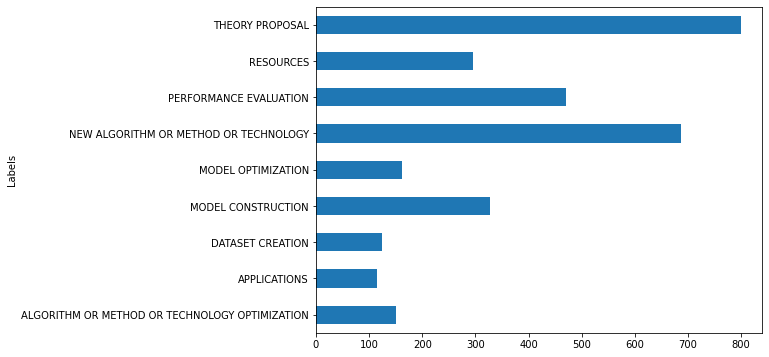

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
d2['Labels'] = d2['Labels'].apply(lambda x: " ".join(x.upper() for x in x.split()))

d2.groupby('Labels').Contributions.count().plot.barh(ylim=0)
plt.show() #train data results --- rectify labels

#Feature Extraction

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(d2.Contributions).toarray()
labels = d2.category_id
features.shape

(3133, 2376)

In [ ]:
#N-grams
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Labels, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id) #chi squared test
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Labels))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'ALGORITHM OR METHOD OR TECHNOLOGY OPTIMIZATION':
  . Most correlated unigrams:
       . method
       . discriminative
  . Most correlated bigrams:
       . outperforms previous
       . blockchain technology
# 'APPLICATIONS':
  . Most correlated unigrams:
       . applying
       . application
  . Most correlated bigrams:
       . community detection
       . word sentence
# 'DATASET CREATION':
  . Most correlated unigrams:
       . contains
       . dataset
  . Most correlated bigrams:
       . data set
       . new dataset
# 'MODEL CONSTRUCTION':
  . Most correlated unigrams:
       . cnn
       . model
  . Most correlated bigrams:
       . learning model
       . neural model
# 'MODEL OPTIMIZATION':
  . Most correlated unigrams:
       . outperforms
       . model
  . Most correlated bigrams:
       . model outperforms
       . proposed model
# 'NEW ALGORITHM OR METHOD OR TECHNOLOGY':
  . Most correlated unigrams:
       . propose
       . method
  . Most correlated bigrams:
   

#Naive Bayes

In [ ]:
#Count vectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(d2['Contributions'], d2['Labels'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

#Comparing 4 Classifers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

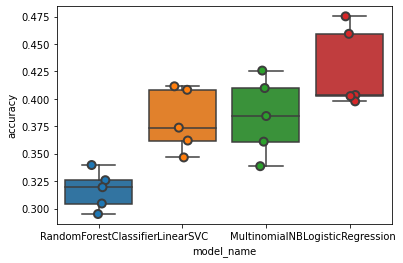

In [ ]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

Logistic Regression has Highest Score

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.380453
LogisticRegression        0.427688
MultinomialNB             0.383955
RandomForestClassifier    0.316952
Name: accuracy, dtype: float64

#Applying Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, d2.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Confusion Matrix

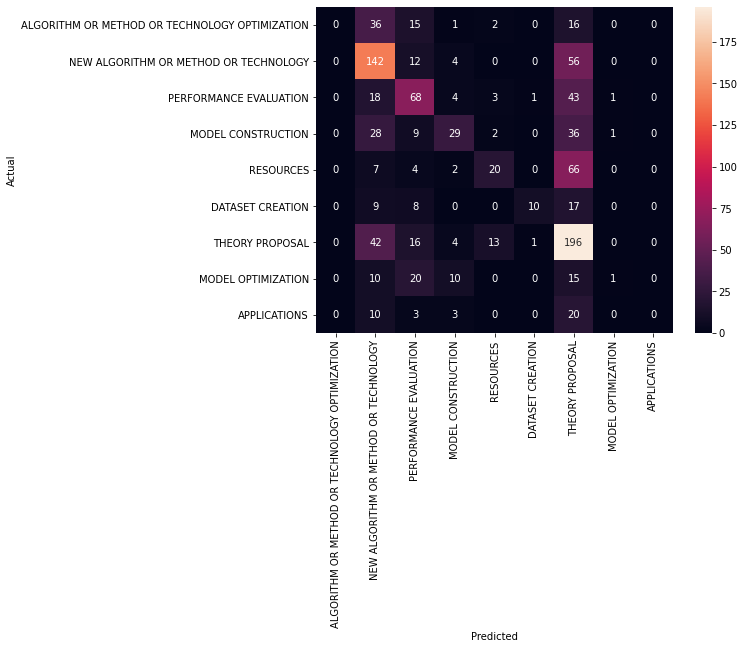

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_d2.Labels.values, yticklabels=category_id_d2.Labels.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Evaluation of Model

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=d2['Labels'].unique()))

                                                precision    recall  f1-score   support

ALGORITHM OR METHOD OR TECHNOLOGY OPTIMIZATION       0.00      0.00      0.00        70
         NEW ALGORITHM OR METHOD OR TECHNOLOGY       0.47      0.66      0.55       214
                        PERFORMANCE EVALUATION       0.44      0.49      0.46       138
                            MODEL CONSTRUCTION       0.51      0.28      0.36       105
                                     RESOURCES       0.50      0.20      0.29        99
                              DATASET CREATION       0.83      0.23      0.36        44
                               THEORY PROPOSAL       0.42      0.72      0.53       272
                            MODEL OPTIMIZATION       0.33      0.02      0.03        56
                                  APPLICATIONS       0.00      0.00      0.00        36

                                      accuracy                           0.45      1034
                              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Model Predicts Label for a contribution Sentence

In [ ]:
#Predicting sentence label

predict_sentence = "broadcasting and virality have similar diffusion power, but play different roles across diffusion stages."
print(clf.predict(count_vect.transform([predict_sentence])))

['THEORY PROPOSAL']


In [ ]:
#Predicting sentence label

predict_sentence = "we report the results of our study on sensation effects that underlie human emotions as revealed in social media. We focus on the key five types of sensations: sight, hearing, touch, smell, and taste. We first establish a correlation between emotion and sensation in terms of linguistic expressions"
print(clf.predict(count_vect.transform([predict_sentence])))

['THEORY PROPOSAL']


In [ ]:
#Predicting sentence label

predict_sentence = "We propose a novel method to score documents on their semantic progressiveness, thereby identifying documents on the vanguard of semantic change."
print(clf.predict(count_vect.transform([predict_sentence])))

['NEW ALGORITHM OR METHOD OR TECHNOLOGY']
